In [1]:
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import jinja2
import os
from pathlib import Path
from dotenv import load_dotenv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.ensemble import IsolationForest


c:\Users\Martin James\Documents\Anomaly_Detection\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# path = kagglehub.dataset_download("boltzmannbrain/nab")
# print("Path to dataset files: ", path)

In [2]:
load_dotenv()

True

In [3]:
# pd.read_csv(r"C:\Users\Martin James\.cache\kagglehub\datasets\boltzmannbrain\nab\versions\1\realAWSCloudwatch\realAWSCloudwatch\")
AWS_dir_path = Path(os.getenv("AWS_DIR_PATH"))
# all_AWS_paths = [os.path.join(AWS_dir_path, file) for file in os.listdir(AWS_dir_path) if file.endswith(".csv")]
all_AWS_paths = [AWS_dir_path / file for file in os.listdir(str(AWS_dir_path)) if file.endswith(".csv")]

# for my_path in all_AWS_paths:
#     print(my_path.name)

In [ ]:
AWS_name_gen = (x.name for x in all_AWS_paths)
all_AWS_df_list = [pd.read_csv(my_path) for my_path in all_AWS_paths]

for df in all_AWS_df_list:
    std_scaler = StandardScaler()
    rbst_scaler = RobustScaler()
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['std_value'] = std_scaler.fit_transform(df[['value']]) # reminder that double brackets returns a df, not a series
    # df['rbst_value'] = rbst_scaler.fit_transform(df[['value']])
    # df.style.set_caption(next(AWS_name_gen, "somethingWentWrong"))
    
    display(df.tail(2).style.set_caption(next(AWS_name_gen, "somethingWentWrong")))

In [ ]:
inp_df = all_AWS_df_list[0]

In [ ]:
def run_iso(my_df, window=5, contamination="auto"):
    # window = 5
    X = []

    for i in range(len(my_df) - window):
        X.append(my_df['std_value'].iloc[i:i+window].values)

    X = np.array(X)

    iso = IsolationForest(contamination=contamination, random_state=1)
    y_pred = iso.fit_predict(X)

    # align predictions with dataframe
    my_df['anomaly_window'] = 0
    my_df.loc[window-1:, 'anomaly_window'] = np.append((y_pred == -1).astype(int), 1) # fixing the minor misalignment


In [ ]:
run_iso(inp_df, window=7)
# inp_df

In [ ]:
# inp_df.describe()
inp_df[inp_df["anomaly_window"] == 1].head()

In [43]:
plt.figure(figsize=(12,6))
plt.plot(inp_df['timestamp'], inp_df['std_value'], label='Standard-scaled Value', color='blue', zorder=1)

# Optional: highlight anomalies if you have them
anomalies = inp_df[inp_df['anomaly_window'] == 1]
plt.scatter(anomalies['timestamp'], anomalies['std_value'], 
            color='red', label='Anomaly', marker='x', zorder=2)

plt.xlabel("Timestamp")
plt.ylabel("Standard-scaled value")
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'inp_df' is not defined

<Figure size 1200x600 with 0 Axes>

## MVAD dataset

In [ ]:
merged_df = None

In [ ]:
MVAD_csv_path = Path(os.getenv("MVAD_CSV_PATH"))

if merged_df == None:
    merged_df = pd.read_csv(MVAD_csv_path)
# merged_df.head()



In [6]:
merged_df.describe()

,cpu_temperature,cpu_usage,cpu_load,memory_usage,battery_level,cpu_power,anomaly
count,2.200100e+07,2.200100e+07,2.200100e+07,2.200100e+07,2.200100e+07,2.200100e+07,1.000100e+07
mean,5.472534e+01,4.629903e+01,2.096583e+00,5.045290e+01,5.938855e+01,3.443126e+01,3.498380e-02
std,1.477406e+01,1.859389e+01,9.568915e-01,1.458640e+01,2.411135e+01,1.280995e+01,1.837388e-01
min,1.624273e+01,-1.763126e+01,-6.884508e-01,5.558192e+00,0.000000e+00,3.841720e+00,0.000000e+00
25%,4.230021e+01,3.367769e+01,1.582006e+00,3.824348e+01,3.944375e+01,2.459827e+01,0.000000e+00
50%,5.919930e+01,4.390329e+01,2.037027e+00,4.988296e+01,5.963671e+01,2.851598e+01,0.000000e+00
75%,6.605006e+01,5.610813e+01,2.503584e+00,6.178745e+01,7.982759e+01,4.403340e+01,0.000000e+00
max,1.104958e+02,1.756515e+02,9.999998e+00,1.034214e+02,1.080887e+02,8.769385e+01,1.000000e+00


In [29]:
merged_df["timestamp"] = pd.to_datetime(merged_df["timestamp"])
merged_df.head()

,timestamp,cpu_temperature,cpu_usage,cpu_load,memory_usage,battery_level,cpu_power,anomaly,identifier
0,2024-11-29 09:09:57.057439,41.490142,35.179593,2.336904,43.788196,99.915688,33.196576,0.0,pc1
1,2024-11-29 09:09:57.157439,39.585270,52.040069,2.012390,32.630828,100.000000,43.756880,0.0,pc1
2,2024-11-29 09:09:57.257439,41.943191,49.847277,2.148926,40.297797,96.634885,43.539590,0.0,pc1
3,2024-11-29 09:09:57.357439,44.569278,40.875797,1.232071,36.102717,100.000000,35.868198,0.0,pc1
4,2024-11-29 09:09:57.457439,39.297791,19.345670,2.673152,34.724144,89.363255,28.023581,0.0,pc1


In [26]:
# merged_df[merged_df['anomaly']==nan].count()
# merged_df[(merged_df['anomaly'].isna()) & (merged_df["identifier"]=="pc2")]
merged_df[(merged_df["identifier"]=="pc2")]

,timestamp,cpu_temperature,cpu_usage,cpu_load,memory_usage,battery_level,cpu_power,anomaly,identifier
10001000,2024-11-29 22:33:51.356533,66.210862,38.599980,2.059690,51.048539,99.905166,22.321152,NaN,pc2
10001001,2024-11-29 22:33:51.456533,67.818980,35.366672,2.049953,72.119658,102.105780,26.392518,NaN,pc2
10001002,2024-11-29 22:33:51.556533,62.822901,56.445725,1.586319,95.334475,97.268314,19.998402,NaN,pc2
10001003,2024-11-29 22:33:51.656533,76.247971,39.339458,1.200303,52.663749,98.256837,29.819617,NaN,pc2
10001004,2024-11-29 22:33:51.756533,57.955404,18.315938,1.701509,42.556337,103.787326,23.614287,NaN,pc2
...,...,...,...,...,...,...,...,...,...
22000995,2024-12-01 02:22:40.842158,69.681832,37.065673,2.738728,71.588255,20.135536,26.256534,NaN,pc2
22000996,2024-12-01 02:22:40.942158,64.337354,26.181364,2.138116,73.494043,20.643898,27.003941,NaN,pc2
22000997,2024-12-01 02:22:41.042158,68.877180,19.335015,1.452429,63.638455,21.874934,27.756541,NaN,pc2
22000998,2024-12-01 02:22:41.142158,65.709296,28.760274,1.672550,66.163157,23.064778,25.096353,NaN,pc2


In [33]:
pc1_df = merged_df[merged_df["identifier"] == "pc1"]
pc1_df.describe()

,timestamp,cpu_temperature,cpu_usage,cpu_load,memory_usage,battery_level,cpu_power,anomaly
count,10001000,1.000100e+07,1.000100e+07,1.000100e+07,1.000100e+07,1.000100e+07,1.000100e+07,1.000100e+07
mean,2024-12-05 04:02:27.017411328,4.174923e+01,5.275351e+01,2.072775e+00,3.749818e+01,5.980185e+01,4.499914e+01,3.498380e-02
min,2024-11-29 09:09:57.057439,1.624273e+01,5.672135e-04,6.718557e-07,5.558192e+00,0.000000e+00,3.841720e+00,0.000000e+00
25%,2024-12-02 06:35:22.032439040,3.369778e+01,3.737820e+01,1.404004e+00,3.296143e+01,3.998035e+01,3.686457e+01,0.000000e+00
50%,2024-12-05 04:02:27.007438848,4.077639e+01,5.141025e+01,2.104504e+00,3.750030e+01,6.000550e+01,4.499574e+01,0.000000e+00
75%,2024-12-08 01:29:31.982438912,4.747996e+01,6.549397e+01,2.741236e+00,4.203734e+01,8.002154e+01,5.312889e+01,0.000000e+00
max,2024-12-10 22:56:36.957439,1.104958e+02,1.756515e+02,5.443351e+00,7.283221e+01,1.000000e+02,8.769385e+01,1.000000e+00
std,NaN,1.099282e+01,2.115173e+01,8.659950e-01,6.612515e+00,2.407556e+01,1.081496e+01,1.837388e-01


In [40]:
std_scaler_pc1 = StandardScaler()
scalable_columns = ["cpu_temperature", "cpu_usage", "cpu_load", "memory_usage", "battery_level", "cpu_power"]
pc1_scaled = pd.DataFrame(std_scaler_pc1.fit_transform(pc1_df[scalable_columns]), columns=scalable_columns, index=pc1_df.index)
pc1_scaled["timestamp"] = pc1_df["timestamp"]
pc1_scaled["anomaly"] = pc1_df["anomaly"]


In [41]:
reordered_columns = ["timestamp"]
reordered_columns.extend(scalable_columns)
reordered_columns.extend(["anomaly"])
# reordered_columns
pc1_scaled = pc1_scaled[reordered_columns]
# pc1_scaled.head(2)

In [42]:
display(pc1_scaled.head())
pc1_scaled.describe()

,timestamp,cpu_temperature,cpu_usage,cpu_load,memory_usage,battery_level,cpu_power,anomaly
0,2024-11-29 09:09:57.057439,-0.023569,-0.830850,0.305001,0.951229,1.666164,-1.091318,0.0
1,2024-11-29 09:09:57.157439,-0.196852,-0.033730,-0.069729,-0.736082,1.669666,-0.114865,0.0
2,2024-11-29 09:09:57.257439,0.017644,-0.137399,0.087935,0.423381,1.529893,-0.134956,0.0
3,2024-11-29 09:09:57.357439,0.256535,-0.561548,-0.970795,-0.211034,1.669666,-0.844288,0.0
4,2024-11-29 09:09:57.457439,-0.223004,-1.579438,0.693280,-0.419513,1.227859,-1.569636,0.0


,timestamp,cpu_temperature,cpu_usage,cpu_load,memory_usage,battery_level,cpu_power,anomaly
count,10001000,1.000100e+07,1.000100e+07,1.000100e+07,1.000100e+07,1.000100e+07,1.000100e+07,1.000100e+07
mean,2024-12-05 04:02:27.017411328,-7.558643e-15,1.502582e-15,1.668028e-15,-5.357468e-16,6.770693e-15,-7.323628e-15,3.498380e-02
min,2024-11-29 09:09:57.057439,-2.320288e+00,-2.494026e+00,-2.393517e+00,-4.830234e+00,-2.483924e+00,-3.805600e+00,0.000000e+00
25%,2024-12-02 06:35:22.032439040,-7.324282e-01,-7.269059e-01,-7.722572e-01,-6.860859e-01,-8.233040e-01,-7.521585e-01,0.000000e+00
50%,2024-12-05 04:02:27.007438848,-8.849822e-02,-6.350603e-02,3.663928e-02,3.201381e-04,8.458594e-03,-3.140362e-04,0.000000e+00
75%,2024-12-08 01:29:31.982438912,5.213152e-01,6.023365e-01,7.719004e-01,6.864503e-01,8.398429e-01,7.517134e-01,0.000000e+00
max,2024-12-10 22:56:36.957439,6.253768e+00,5.810308e+00,3.892143e+00,5.343509e+00,1.669666e+00,3.947744e+00,1.000000e+00
std,NaN,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.837388e-01


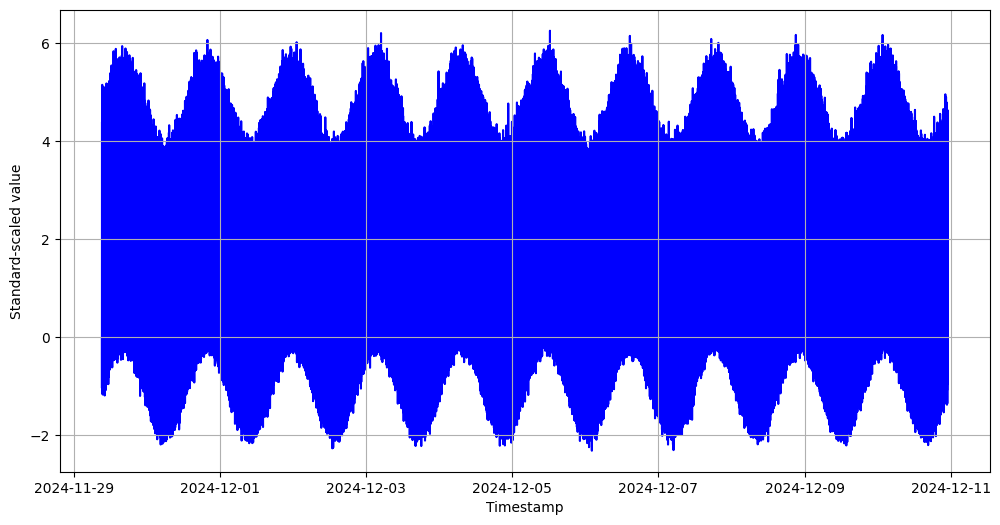

In [45]:
plt.figure(figsize=(12,6))
plt.plot(pc1_scaled['timestamp'], pc1_scaled['cpu_temperature'], label='Standard-scaled Value of cpu_temperature', color='blue', zorder=1)

# Optional: highlight anomalies if you have them
# anomalies = inp_df[inp_df['anomaly_window'] == 1]
# plt.scatter(anomalies['timestamp'], anomalies['std_value'], 
#             color='red', label='Anomaly', marker='x', zorder=2)

plt.xlabel("Timestamp")
plt.ylabel("Standard-scaled value")
# plt.legend()
plt.grid(True)
plt.show()

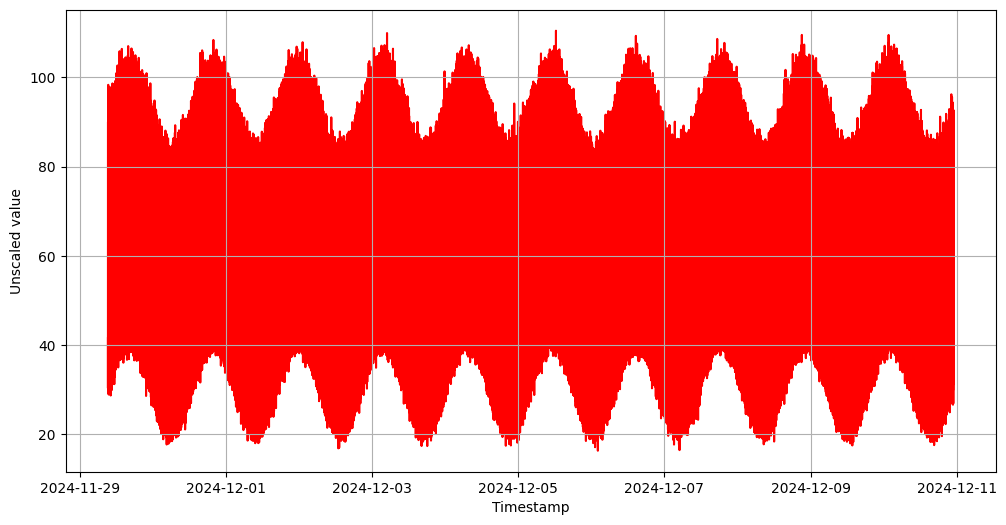

In [48]:
plt.figure(figsize=(12,6))
plt.plot(pc1_df['timestamp'], pc1_df['cpu_temperature'], label='Value of cpu_temperature', color='red', zorder=1)

# Optional: highlight anomalies if you have them
# anomalies = inp_df[inp_df['anomaly_window'] == 1]
# plt.scatter(anomalies['timestamp'], anomalies['std_value'], 
#             color='red', label='Anomaly', marker='x', zorder=2)

plt.xlabel("Timestamp")
plt.ylabel("Unscaled value")
# plt.legend()
plt.grid(True)
plt.show()